In [104]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.preprocessing import power_transform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys, os

%matplotlib inline 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [105]:
data = pd.read_csv('hp_train2.csv')
df = pd.DataFrame()
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


#### First of all, les's displays the five-number summary of a our data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

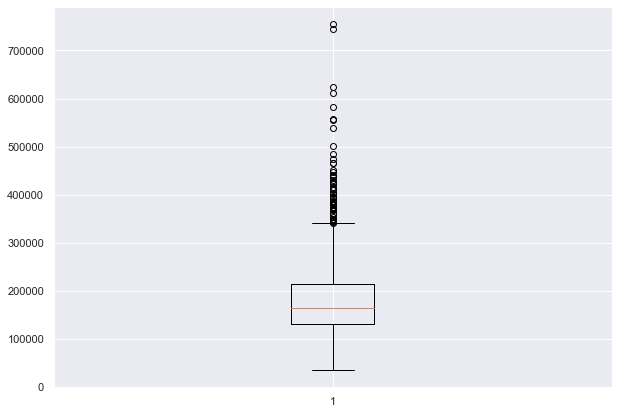

In [106]:
data = data['SalePrice']
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()

### Kernel density estimate (KDE) plot

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

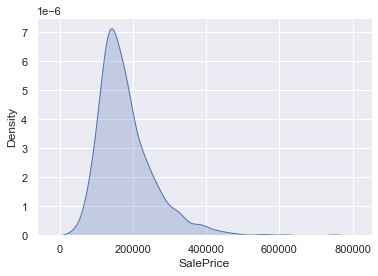

In [108]:
sns.kdeplot(data=data, shade=True)

## Scale target column with MinMax method 

""


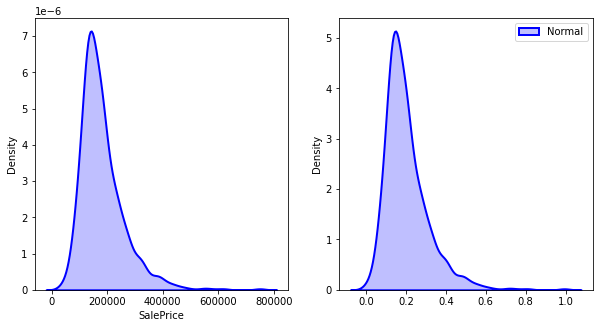

In [93]:
scaler = MinMaxScaler()
fitted_data  = scaler.fit_transform(data[['SalePrice']]).tolist()
data['SalePriceMinMaxScaler'] = fitted_data

fig, ax = plt.subplots(1, 2)
sns.distplot(data['SalePrice'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="blue", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="blue", ax = ax[1])
 
plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)

df

#### Here we can see a Min-Max scaler doesn't reduce the skewness of a distribution. It simply shifts the distribution to a smaller scale [0–1].

## Scale target column with StandardScaler method 

,SalePriceStandardScaler
0,[0.34727321973650555]
1,[0.007288320622424051]
2,[0.5361537192443286]
3,[-0.5152810613492198]
4,[0.8698426017081494]
...,...
1455,[-0.07455989583096595]
1456,[0.3661612696872879]
1457,[1.0776111511667548]
1458,[-0.4885229905856115]


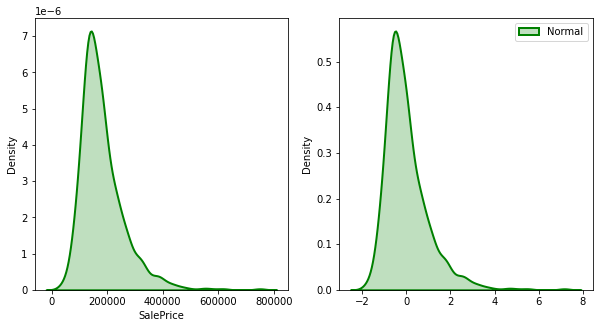

In [94]:
scaler = StandardScaler()
fitted_data = scaler.fit_transform(data[['SalePrice']]).tolist()
df['SalePriceStandardScaler'] = fitted_data

fig, ax = plt.subplots(1, 2)
sns.distplot(data['SalePrice'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)

df


#### The StandardScaler function from the sklearn library actually does not convert a distribution into a Gaussian or Normal distribution. It is used when there are large variations among the distribution values.

## Transform target column with log/log1p/sqrt method

,SalePriceStandardScaler,natural_log
0,[0.34727321973650555],12.247694
1,[0.007288320622424051],12.109011
2,[0.5361537192443286],12.317167
3,[-0.5152810613492198],11.849398
4,[0.8698426017081494],12.429216
...,...,...
1455,[-0.07455989583096595],12.072541
1456,[0.3661612696872879],12.254863
1457,[1.0776111511667548],12.493130
1458,[-0.4885229905856115],11.864462


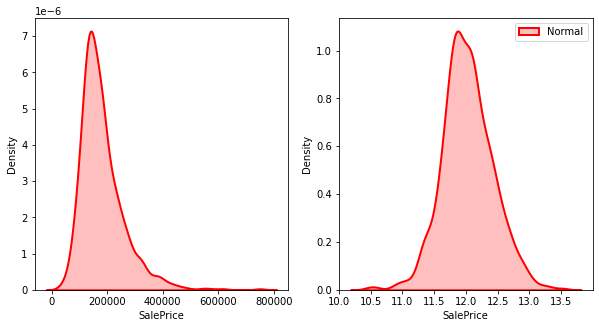

In [95]:
fitted_data = np.log(data['SalePrice'])
df['natural_log'] = fitted_data

fig, ax = plt.subplots(1, 2)
sns.distplot(data['SalePrice'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="red", ax = ax[1])

plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)

df

#### Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

,SalePriceStandardScaler,natural_log,log1p
0,[0.34727321973650555],12.247694,12.247699
1,[0.007288320622424051],12.109011,12.109016
2,[0.5361537192443286],12.317167,12.317171
3,[-0.5152810613492198],11.849398,11.849405
4,[0.8698426017081494],12.429216,12.429220
...,...,...,...
1455,[-0.07455989583096595],12.072541,12.072547
1456,[0.3661612696872879],12.254863,12.254868
1457,[1.0776111511667548],12.493130,12.493133
1458,[-0.4885229905856115],11.864462,11.864469


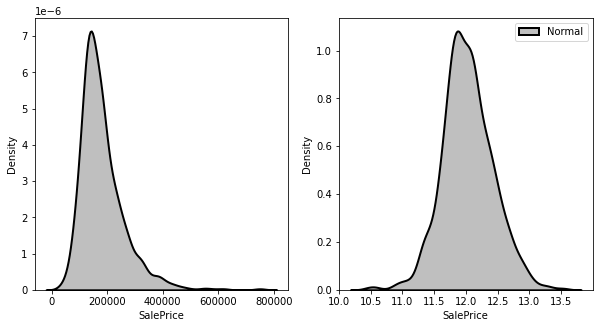

In [96]:
fitted_data = np.log1p(data['SalePrice'])
df['log1p'] = fitted_data

fig, ax = plt.subplots(1, 2)
sns.distplot(data['SalePrice'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="black", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="black", ax = ax[1])

plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)

df

,SalePriceStandardScaler,natural_log,log1p,sqrt
0,[0.34727321973650555],12.247694,12.247699,456.618002
1,[0.007288320622424051],12.109011,12.109016,426.028168
2,[0.5361537192443286],12.317167,12.317171,472.757866
3,[-0.5152810613492198],11.849398,11.849405,374.165739
4,[0.8698426017081494],12.429216,12.429220,500.000000
...,...,...,...,...
1455,[-0.07455989583096595],12.072541,12.072547,418.330013
1456,[0.3661612696872879],12.254863,12.254868,458.257569
1457,[1.0776111511667548],12.493130,12.493133,516.236380
1458,[-0.4885229905856115],11.864462,11.864469,376.994695


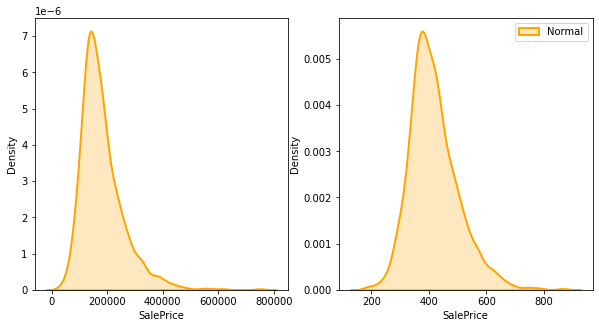

In [97]:
fitted_data = np.sqrt((data['SalePrice']))
df['sqrt'] = fitted_data

fig, ax = plt.subplots(1, 2)
sns.distplot(data['SalePrice'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="orange", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="orange", ax = ax[1])

plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)

df

#### A square root transformation has the effect of making the data less skew and making the variation more uniform.

## Box Cox transformation

Lambda value used for Transformation: -0.07692391328663316


,SalePriceStandardScaler,natural_log,log1p,sqrt,power_Transformation,box_cox_scipy
0,[0.34727321973650555],12.247694,12.247699,456.618002,0.571154,-0.076924
1,[0.007288320622424051],12.109011,12.109016,426.028168,0.227627,-0.076924
2,[0.5361537192443286],12.317167,12.317171,472.757866,0.741868,-0.076924
3,[-0.5152810613492198],11.849398,11.849405,374.165739,-0.425386,-0.076924
4,[0.8698426017081494],12.429216,12.429220,500.000000,1.015293,-0.076924
...,...,...,...,...,...,...
1455,[-0.07455989583096595],12.072541,12.072547,418.330013,0.136679,-0.076924
1456,[0.3661612696872879],12.254863,12.254868,458.257569,0.588811,-0.076924
1457,[1.0776111511667548],12.493130,12.493133,516.236380,1.170202,-0.076924
1458,[-0.4885229905856115],11.864462,11.864469,376.994695,-0.387136,-0.076924


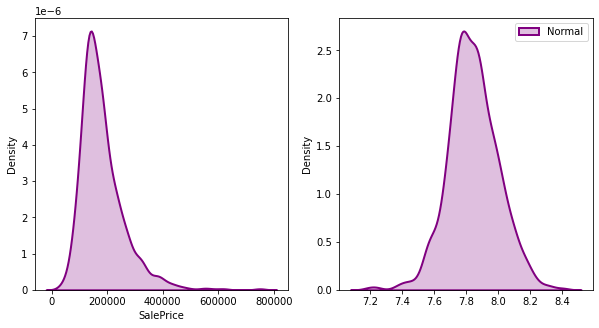

In [98]:
df['power_Transformation'] = power_transform(data['SalePrice'].to_numpy().reshape(-1, 1), method='box-cox')


fitted_data, fitted_lambda = stats.boxcox(data['SalePrice'])
df['box_cox_scipy'] = fitted_lambda

fig, ax = plt.subplots(1, 2)
sns.distplot(data['SalePrice'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="Purple", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="Purple", ax = ax[1])
 
plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
df

#### The Box-Cox transformation transforms our data so that it closely resembles a normal distribution. In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests.